In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [28]:
img = cv2.imread("../assets/imori.jpg", 0)

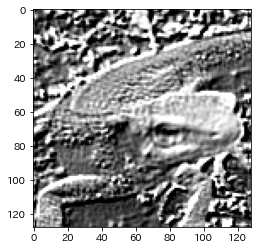

In [29]:
# Emboss kernel
kernel = np.array([[-2, -1,  0],
                                [-1, 1, 1],
                                [0, 1,  2]]).astype(np.float32)
# Emboss filtering
dst = cv2.filter2D(img, cv2.CV_8U, kernel)
plt.imshow(dst, cmap="gray")

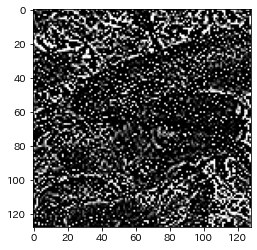

In [30]:
# LoG kernel
K = np.array([[0, 0, 1, 0, 0],
                        [0, 1, 2, 1, 0],
                        [1, 2, -16, 2, 1],
                        [0, 1, 2, 1, 0],
                        [0, 0, 1, 0, 0]])
# LoG filtering
log = cv2.filter2D(img2, cv2.CV_8U, K)
plt.imshow(log, cmap="gray")

In [19]:
# DoG filtering
def DoG_filtering(img, ksize, sigma1, sigma2):
    g1 = cv2.GaussianBlur(img, ksize, sigma1)
    g2 = cv2.GaussianBlur(img, ksize, sigma2)
    
    return g1 - g2

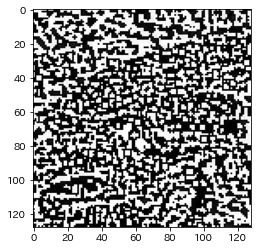

In [21]:
dst = DoG_filtering(img2, (5,5), 1.2, 10.2)
plt.imshow(dst, cmap="gray")

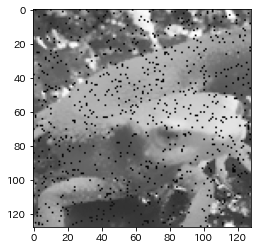

In [25]:
# Bilateral filter
bilat = cv2.bilateralFilter(img2, 15, 20, 20)  # cv2.bilateralFilter(img, d, sigmaColor, sigmaSpace)
# src: 入力画像
# d: 注目画素をぼかすために使われる領域
# sigmaColor: 色についての標準偏差。これが大きいと、画素値の差が大きくても大きな重みが採用される。
# sigmaSpace: 距離についての標準偏差。これが大きいと、画素間の距離が広くても大きな重みが採用される。
plt.imshow(bilat, cmap="gray")

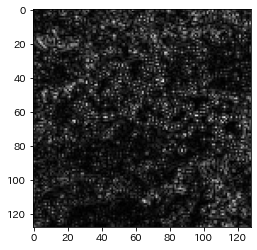

In [48]:
# Gaussian > Grayscale > Laplaceian
img3 = cv2.imread("../assets/imori_noise.jpg")
src = cv2.GaussianBlur(img3, (3,3), 0)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
dst = cv2.Laplacian(gray, cv2.CV_16S, 3)
# CV_16S > CV_8U
abs_dst = cv2.convertScaleAbs(dst)
plt.imshow(abs_dst, cmap="gray")